# Regression model with Scikit-learn

## Table of Contents

* [1. Explore and prepare data](#ch1)
* [2. Regression on simple linear model](#ch2)
* [3. Regression on multiple linear model](#ch3)
* [4. Standarizing numeric data](#ch4)
* [5. Linear regression with categorical values](#ch5)
* [6. Regression Model](#ch6)
    * [6.1. Linear Regression](#ch6_1)
        * [6.1.1. Simple Linear Regression](#ch6_1_1)
        * [6.1.2. Multiple Linear Regression](#ch6_1_2)
    * [6.2. Regularized Regression Model](#ch6_2)
        * [6.2.1. Lasso](#ch6_2_1)
        * [6.2.2. Ridge](#ch6_2_2)
        * [6.2.3. Elastic Net](#ch6_2_3)
    * [6.3. Support Vector Machines](#ch6_3)
    * [6.4. Nearest neighbors regression](#ch6_4)
    * [6.5. Stochastic gradient regression](#ch6_5)
    * [6.6. Decision Tree regression](#ch6_6)
    * [6.7. Least-angle regression (LARS)](#ch6_7)
* [7. Hyperparameter tuning](#ch7)
    * [7.1. Hyperparameter tuning Lasso](#ch7_1)
    * [7.2. Hyperparameter nearest neighbors](#ch7_2)

## 1. Prepare and explore data <a class="anchor" id="ch1"></a>

In [1]:
import sklearn 
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
automobile_df = automobile_df.replace('?' , np.nan)
automobile_df = automobile_df.dropna()
automobile_df.drop(['origin','car name'],axis=1,inplace=True)

In [4]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
152,19.0,6,225.0,95,3264,16.0,75
149,24.0,4,120.0,97,2489,15.0,74
14,24.0,4,113.0,95,2372,15.0,70
59,23.0,4,97.0,54,2254,23.5,72
180,25.0,4,121.0,115,2671,13.5,75


In [5]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [6]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [7]:
automobile_df.drop(['model year'],axis=1,inplace=True)

In [8]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
224,15.0,8,302.0,130,4295,14.9,46
139,14.0,8,302.0,140,4638,16.0,49
358,31.6,4,120.0,74,2635,18.3,42
249,19.9,8,260.0,110,3365,15.5,45
27,11.0,8,318.0,210,4382,13.5,53


In [9]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [10]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [11]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,47.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,41.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,44.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,47.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,53.000000


In [12]:
automibile_data_corr = automobile_df.corr()
automibile_data_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

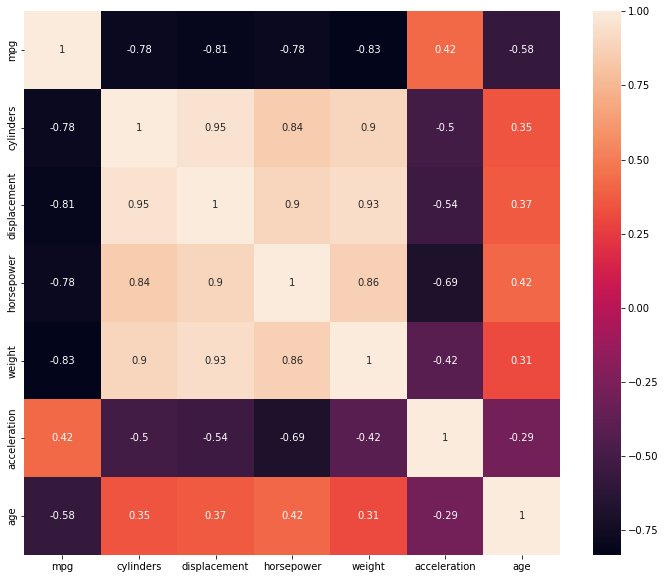

In [13]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(automibile_data_corr,annot=True)

In [14]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,21.0,4,120.0,87,2979,19.5,51
1,16.0,8,400.0,170,4668,11.5,48
2,10.0,8,360.0,215,4615,14.0,53
3,22.5,6,232.0,90,3085,17.6,47
4,15.0,6,250.0,72,3158,19.5,48


In [15]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

## Regression on simple linear model

In [16]:
from sklearn.model_selection import train_test_split
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
# Calculer le minimum et le maximum de chaque colonne de la matrice X
# min_vals = np.min(x_train, axis=0)
# max_vals = np.max(x_train, axis=0)

# # Effectuer la normalisation min-max pour chaque valeur de la matrice X
# x_train = (x_train - min_vals) / (max_vals - min_vals)
linear_model = LinearRegression().fit(x_train, y_train)

In [18]:
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.5832927380265178


In [19]:
y_pred = linear_model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.6705599537280823


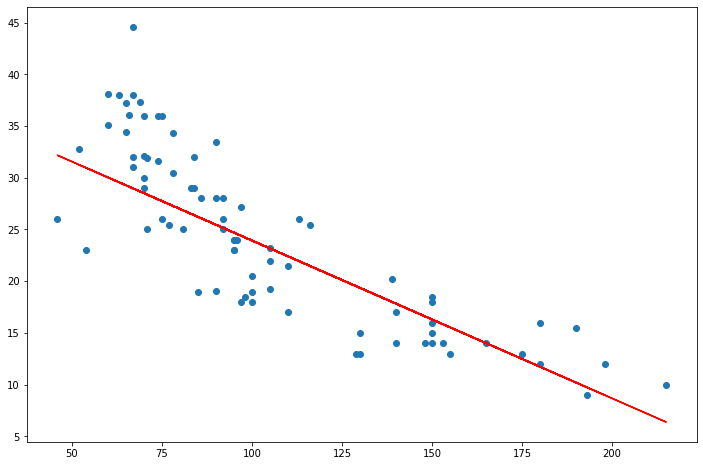

In [21]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.show()

## Regression on multiple linear model

In [22]:
X = automobile_df[['displacement','horsepower','weight']]
# en ajoutant plus de featurs on pourait obtenir un meilleur training score mais pas forcement une meileur r2. Toutes les features n'on pas une bonne force de predictions 
Y = automobile_df['mpg']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
linear_model = LinearRegression().fit(x_train, y_train)
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.7075584835323014


In [23]:
# w = weight or coef of the model
predictors  = x_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

horsepower     -0.032655
displacement   -0.007339
weight         -0.005550
dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.7005552135740918


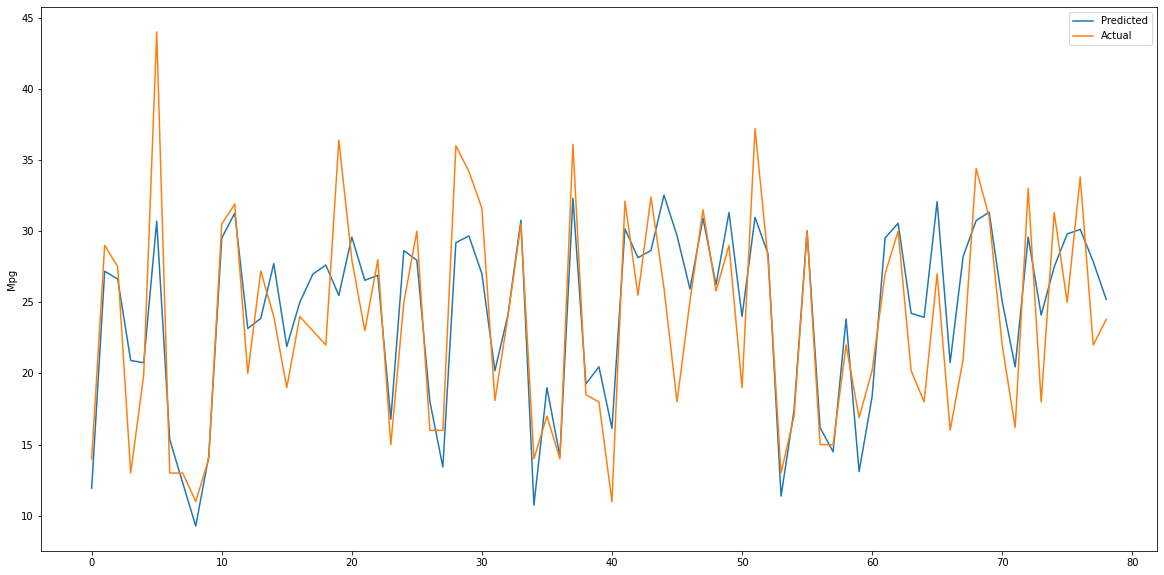

In [26]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('Mpg')
plt.legend()
plt.show()

## Standarizing numeric data

In [27]:
exam_df = pd.read_csv('datasets/exams.csv')
exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
44,male,group C,some college,free/reduced,completed,49,54,50
76,male,group B,some college,free/reduced,none,70,61,62
9,female,group D,some college,standard,completed,62,63,62
83,female,group C,associate's degree,standard,completed,69,74,82
51,male,group D,some college,free/reduced,none,38,44,45


In [28]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.350000,67.530000,66.590000
std,16.473655,14.101691,15.034032
min,30.000000,33.000000,28.000000
25%,53.000000,58.000000,57.000000
50%,67.000000,67.000000,66.000000
75%,78.000000,77.250000,78.000000
max,98.000000,100.000000,100.000000


In [29]:
from sklearn import preprocessing
# Standarize dtaset to have 0 mean and unit variance
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))


In [30]:
exam_df.head()
# negatif = inf a la moyenne

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,free/reduced,none,-1.485564,-1.320647,-1.643862
1,male,group B,bachelor's degree,standard,none,1.442858,1.743995,1.163873
2,male,group D,master's degree,standard,none,0.527726,-0.180315,0.428514
3,female,group D,some high school,standard,none,-0.875476,-0.322856,0.094260
4,male,group D,associate's degree,standard,none,1.015796,1.102558,0.963321


In [31]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.480549e-16,-6.272760e-17,-2.406408e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.217670e+00,-2.460978e+00,-2.579774e+00
25%,-8.144674e-01,-6.792101e-01,-6.410996e-01
50%,3.965572e-02,-3.777349e-02,-3.944200e-02
75%,7.107524e-01,6.927515e-01,7.627682e-01
max,1.930928e+00,2.314161e+00,2.233487e+00


## Linear regression with categorical values

In [32]:
exam_df['parental level of education'].unique()

array(["associate's degree", "bachelor's degree", "master's degree",
       'some high school', 'high school', 'some college'], dtype=object)

In [33]:
parent_level_of_education=[
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(parent_level_of_education)

In [34]:
exam_df['parental level of education'] = label_encoding.transform(exam_df['parental level of education'].astype(str))

In [35]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,0,free/reduced,none,-1.485564,-1.320647,-1.643862
1,male,group B,1,standard,none,1.442858,1.743995,1.163873
2,male,group D,3,standard,none,0.527726,-0.180315,0.428514
3,female,group D,5,standard,none,-0.875476,-0.322856,0.094260
4,male,group D,0,standard,none,1.015796,1.102558,0.963321


In [36]:
exam_df = pd.get_dummies(exam_df,columns=['race/ethnicity'])


In [37]:
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,0,free/reduced,none,-1.485564,-1.320647,-1.643862,0,0,1,0,0
1,male,1,standard,none,1.442858,1.743995,1.163873,0,1,0,0,0
2,male,3,standard,none,0.527726,-0.180315,0.428514,0,0,0,1,0
3,female,5,standard,none,-0.875476,-0.322856,0.094260,0,0,0,1,0
4,male,0,standard,none,1.015796,1.102558,0.963321,0,0,0,1,0


In [38]:
exam_df = pd.get_dummies(exam_df,columns=['gender','lunch','test preparation course'])

In [39]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,-1.485564,-1.320647,-1.643862,0,0,1,0,0,0,1,1,0,0,1
1,1,1.442858,1.743995,1.163873,0,1,0,0,0,0,1,0,1,0,1
2,3,0.527726,-0.180315,0.428514,0,0,0,1,0,0,1,0,1,0,1
3,5,-0.875476,-0.322856,0.094260,0,0,0,1,0,1,0,0,1,0,1
4,0,1.015796,1.102558,0.963321,0,0,0,1,0,0,1,0,1,0,1


In [40]:
X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
# one-hot encoding creer de la colinearite pour ls features concerné, on utilise donc fil_intercept = True pour utilisé des dumy variable
# linearRegressor de scikit learn utilise par defaut les dumy variables si il y a one hot vector, donc pas de dif entre fit_intercept true ou false (par precaution true)
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.9100191676776471


In [41]:
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.9100191676776471


In [42]:
y_pred = linear_model.predict(x_test)

In [43]:
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.9243958269962032


In [44]:
df_pred_actual=pd.DataFrame({'predicted' : y_pred , 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
23,0.636170,1.015796
51,-1.239581,-1.729599
86,0.883970,1.381849
2,0.524114,0.527726
79,-0.290642,-0.814467
66,-0.754557,-0.692450
75,0.176505,-0.082362
84,-0.089388,0.039656
82,-0.167562,-0.204379
60,-0.950399,-0.875476


## Regression Model

In [45]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore") # non recomandé

In [46]:
result_dict = {}

In [47]:
def build_model(regression_fn,name_of_y_col,name_of_x_cols,dataset,test_frac=0.2,preprocess_fn = None,show_plot_Y=False,show_plot_scatter=False):
    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_frac)
    model = regression_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Training score: ", model.score(x_train,y_train))
    print('Testing score: ',r2_score(y_test,y_pred))
    
    if show_plot_Y == True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred,label='Predicted')
        plt.plot(y_test.values,label='Actual')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
    if show_plot_scatter == True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'r')
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    return{
        'training_score' : model.score(x_train,y_train),
        'test_score' : r2_score(y_test,y_pred)
        
    }


In [48]:
def compare_results():
    for key in result_dict:
        print('Regression: ',key)
        print('Training score',result_dict[key]['training_score'])
        print('Test score',result_dict[key]['test_score'])
        print()

In [49]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)
    

### Linear Regression

In [50]:
def linear_reg(x_train,y_train):
    model = LinearRegression()
    model.fit(x_train,y_train)
    return model

#### Simple Linear Regression

Training score:  0.6984507811610605
Testing score:  0.6689976021832421


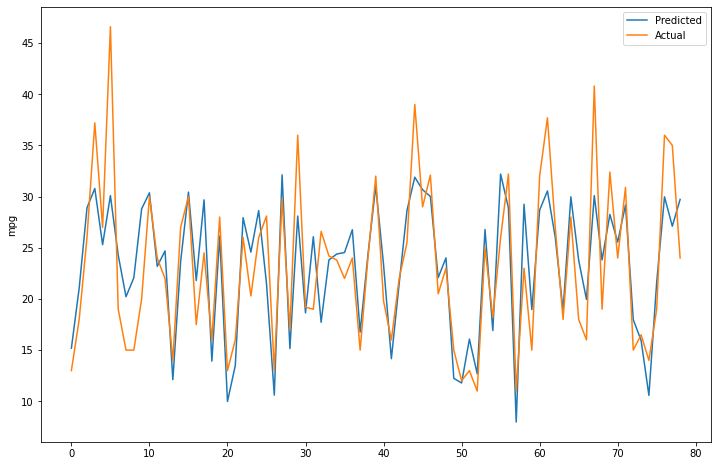

In [51]:
result_dict['mpg - simple linear regression'] = build_model(linear_reg,'mpg',['weight'],automobile_df,preprocess_fn=apply_standard_scaler,show_plot_Y=True)

#### Multiple Linear Regression

Training score:  0.7220127837706658
Testing score:  0.6384175001123806


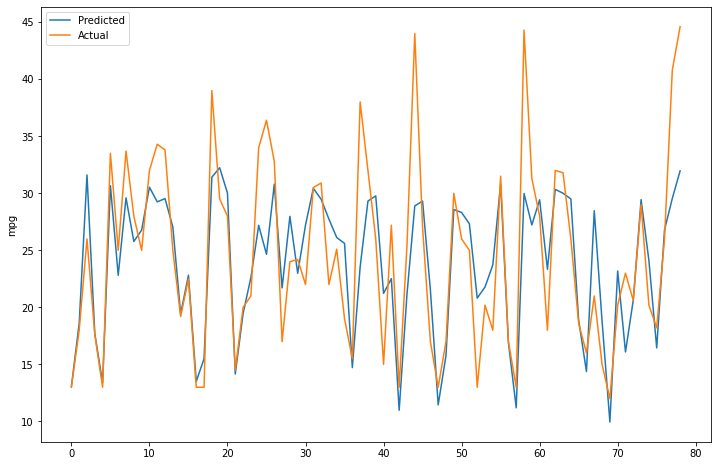

In [52]:
result_dict['mpg - multiple linear regression'] = build_model(linear_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,preprocess_fn=apply_standard_scaler,show_plot_Y=True)

In [53]:
compare_results()

Regression:  mpg - simple linear regression
Training score 0.6984507811610605
Test score 0.6689976021832421

Regression:  mpg - multiple linear regression
Training score 0.7220127837706658
Test score 0.6384175001123806



### Regularized Regression Model

#### Lasso

In [54]:
def lasso_reg(x_train,y_train,alpha=0.5):
    model = Lasso()
    model.fit(x_train,y_train)
    return model

Training score:  0.7126207431205651
Testing score:  0.6756395287058246


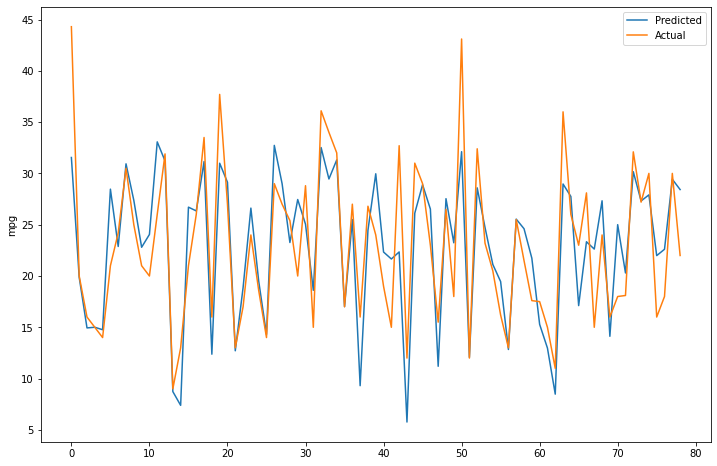

In [55]:
result_dict['mpg - Lasso regression'] = build_model(lasso_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

#### Ridge

In [56]:
def ridge_reg(x_train,y_train,alpha=0.5):
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    return model

Training score:  0.700108640823067
Testing score:  0.7211033942422148


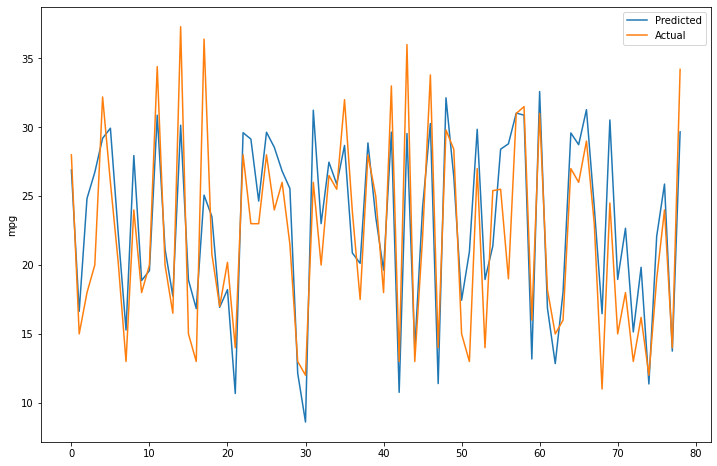

In [57]:
result_dict['mpg - Ridge regression'] = build_model(ridge_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,preprocess_fn=apply_standard_scaler,show_plot_Y=True)

#### Elastic Net

In [58]:
# l1_ratio = 0 is l2 penalty
# l1_ratio = 1 is l1 penalty
# warm start = reuse the solution of the previous call to fit this model as the initialization for the next step; otherwise, juste erase the previous solution
def elastic_net_reg(x_train,y_train,alpha=1,l1_ratio=0.5,max_iter=100000,warm_start=True):
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=max_iter,warm_start=warm_start)
    model.fit(x_train,y_train)
    return model

In [59]:
from functools import partial

Training score:  0.6819377336715919
Testing score:  0.7794952564744144


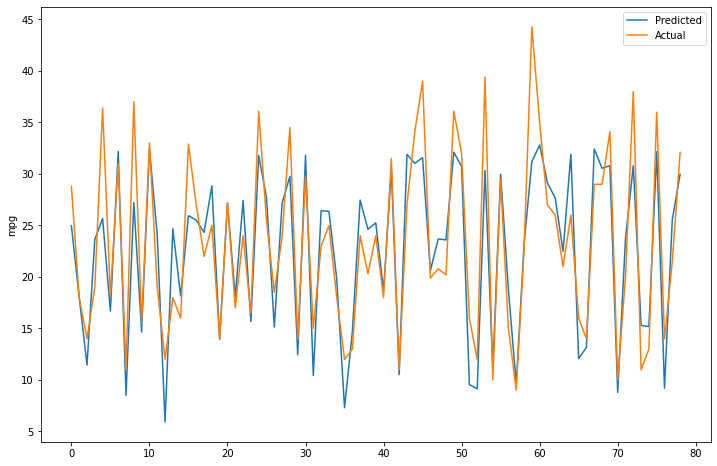

In [60]:
result_dict['mpg - Elastic Net regression'] = build_model(elastic_net_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

In [61]:
compare_results()

Regression:  mpg - simple linear regression
Training score 0.6984507811610605
Test score 0.6689976021832421

Regression:  mpg - multiple linear regression
Training score 0.7220127837706658
Test score 0.6384175001123806

Regression:  mpg - Lasso regression
Training score 0.7126207431205651
Test score 0.6756395287058246

Regression:  mpg - Ridge regression
Training score 0.700108640823067
Test score 0.7211033942422148

Regression:  mpg - Elastic Net regression
Training score 0.6819377336715919
Test score 0.7794952564744144



### Support Vector Machines

In [62]:
# SVR(Kernel=linear) == LinearSVR()-> Better for large dataset
# kernel=linear -> function reduction dimentionality, more flexibilities in penalties and loss function
# epsilon -> Margin or epsilon tube = 2e
#C -> penalty yo apply to points which lie outside the epsilon tube
def svr_reg(x_train,y_train,kernel='linear',epsilon=0.05,C=0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(x_train,y_train)
    return model

Training score:  0.6834070628758435
Testing score:  0.7448831661679123


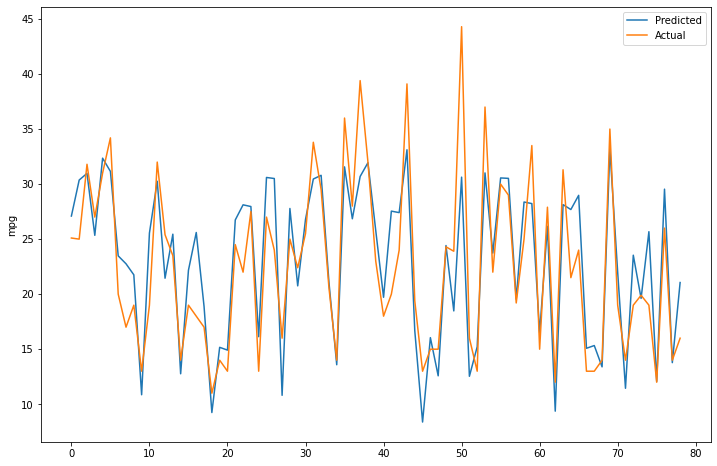

In [63]:
result_dict['mpg - SVR'] = build_model(svr_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

### Nearest neighbors regression

In [64]:
def kneighbors_reg(x_train,y_train,n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    return model

Training score:  0.7659906035164835
Testing score:  0.7097093926739899


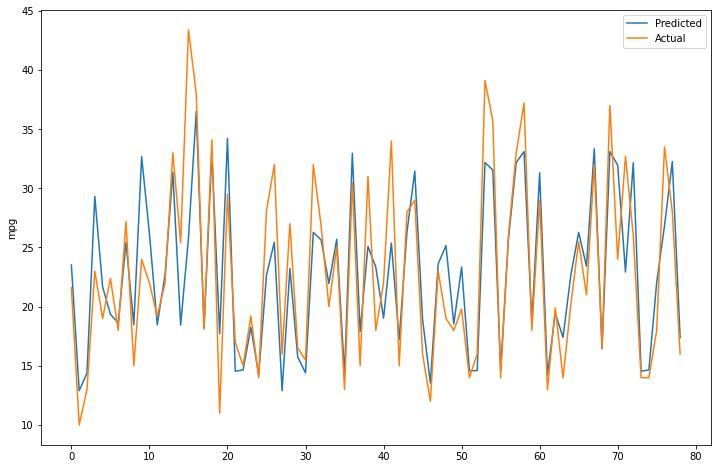

In [65]:
result_dict['mpg - Nearest neighbors'] = build_model(kneighbors_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

### Stochastic gradient regression

In [66]:
def sgd_reg(x_train,y_train,max_iter=100000,tol=1e-3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(x_train,y_train)
    return model

Training score:  0.7094762047011033
Testing score:  0.670566412360608


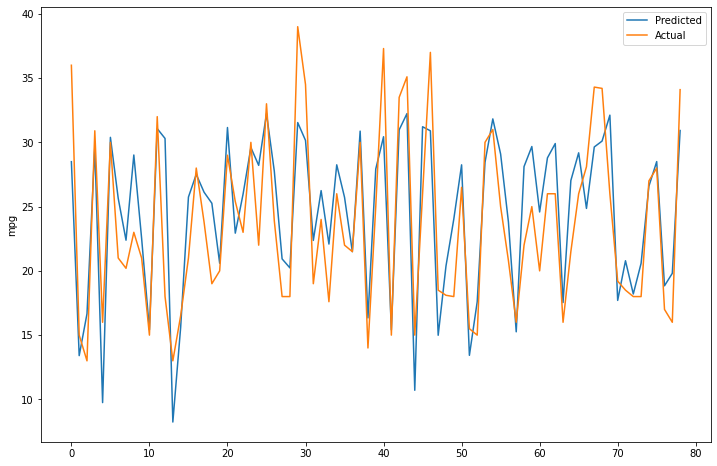

In [67]:
result_dict['mpg - SGD'] = build_model(sgd_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,preprocess_fn=apply_standard_scaler,show_plot_Y=True)

### Decision Tree regression

In [69]:
def decision_tree_reg(x_train,y_train,max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    return model

Training score:  0.7438014831880242
Testing score:  0.6200943655509821


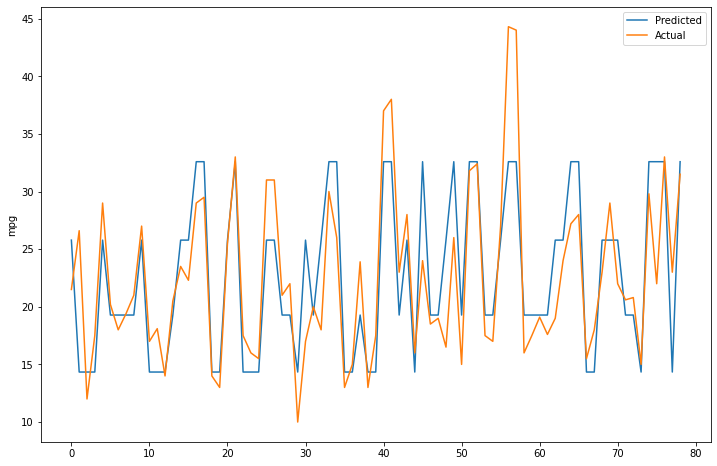

In [70]:
result_dict['mpg - Decision tree'] = build_model(decision_tree_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

### Least-angle regression (LARS)

In [71]:
# n_nonzero_coefs ->nombre maximal de coefficients non nuls que le modèle est autorisé à utiliser. Permet d ajuster la complexiter du model
def lars_reg(x_train,y_train,n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train,y_train)
    return model

Training score:  0.6903080922400308
Testing score:  0.7478672677543656


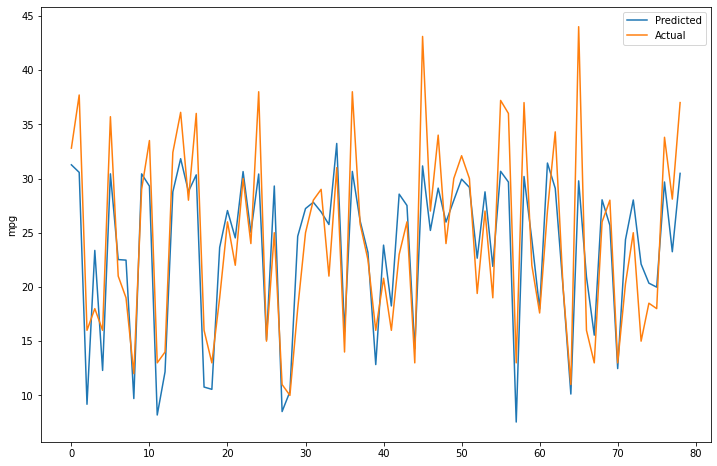

In [72]:
result_dict['mpg - Least angle regression tree'] = build_model(lars_reg,'mpg',['cylinders','displacement','horsepower','weight','acceleration'],automobile_df,show_plot_Y=True)

In [73]:
compare_results()

Regression:  mpg - simple linear regression
Training score 0.6984507811610605
Test score 0.6689976021832421

Regression:  mpg - multiple linear regression
Training score 0.7220127837706658
Test score 0.6384175001123806

Regression:  mpg - Lasso regression
Training score 0.7126207431205651
Test score 0.6756395287058246

Regression:  mpg - Ridge regression
Training score 0.700108640823067
Test score 0.7211033942422148

Regression:  mpg - Elastic Net regression
Training score 0.6819377336715919
Test score 0.7794952564744144

Regression:  mpg - SVR
Training score 0.6834070628758435
Test score 0.7448831661679123

Regression:  mpg - Nearest neighbors
Training score 0.7659906035164835
Test score 0.7097093926739899

Regression:  mpg - SGD
Training score 0.7094762047011033
Test score 0.670566412360608

Regression:  mpg - Decision tree
Training score 0.7438014831880242
Test score 0.6200943655509821

Regression:  mpg - Least angle regression tree
Training score 0.6903080922400308
Test score 0.747

## Hyperparameter tuning

### Hyperparameter tuning Lasso

In [74]:
from sklearn.model_selection import GridSearchCV

In [84]:
automobile_df_2 = pd.read_csv('datasets/auto-mpg-processed.csv')
automobile_df_2.head()
X = automobile_df_2.drop(['mpg','age'], axis= 1)
Y = automobile_df_2['mpg']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [85]:
parameters = {'alpha' : [0.2,0.4,0.6,0.7,0.8,0.9,1.0]}
grid_search = GridSearchCV(Lasso(),parameters,cv=3,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'alpha': 1.0}

In [86]:
for i in range(len(parameters['alpha'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])


Parameters:  {'alpha': 0.2}
Mean test score:  0.7080187071814054
Rank:  7
Parameters:  {'alpha': 0.4}
Mean test score:  0.7102433495423037
Rank:  6
Parameters:  {'alpha': 0.6}
Mean test score:  0.711513764974144
Rank:  5
Parameters:  {'alpha': 0.7}
Mean test score:  0.712051239984001
Rank:  4
Parameters:  {'alpha': 0.8}
Mean test score:  0.7123403173511162
Rank:  3
Parameters:  {'alpha': 0.9}
Mean test score:  0.7123462337252278
Rank:  2
Parameters:  {'alpha': 1.0}
Mean test score:  0.7123524493913789
Rank:  1


In [87]:
lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train,y_train)
y_pred = lasso_model.predict(x_test)
print("Training score: ", lasso_model.score(x_train,y_train))
print('Test score: ',r2_score(y_test,y_pred))

Training score:  0.7204603475602058
Test score:  0.6359249547502215


### Hyperparameter nearest neighbors

In [88]:
parameters = {'n_neighbors' : [10,12,14,18,20,25,30,35,50]}
grid_search = GridSearchCV(KNeighborsRegressor(),parameters,cv=3,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'n_neighbors': 35}

In [89]:
for i in range(len(parameters['n_neighbors'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])


Parameters:  {'n_neighbors': 10}
Mean test score:  0.6997806243318244
Rank:  9
Parameters:  {'n_neighbors': 12}
Mean test score:  0.7057634069550541
Rank:  7
Parameters:  {'n_neighbors': 14}
Mean test score:  0.7016285978006761
Rank:  8
Parameters:  {'n_neighbors': 18}
Mean test score:  0.712266201309983
Rank:  5
Parameters:  {'n_neighbors': 20}
Mean test score:  0.7111141668050148
Rank:  6
Parameters:  {'n_neighbors': 25}
Mean test score:  0.7190506462744609
Rank:  3
Parameters:  {'n_neighbors': 30}
Mean test score:  0.7214967139093975
Rank:  2
Parameters:  {'n_neighbors': 35}
Mean test score:  0.722747206868256
Rank:  1
Parameters:  {'n_neighbors': 50}
Mean test score:  0.7164462088240174
Rank:  4
